## 싸인 함수 회귀분석 (Sine Regression)

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.10.0


## 데이터 생성

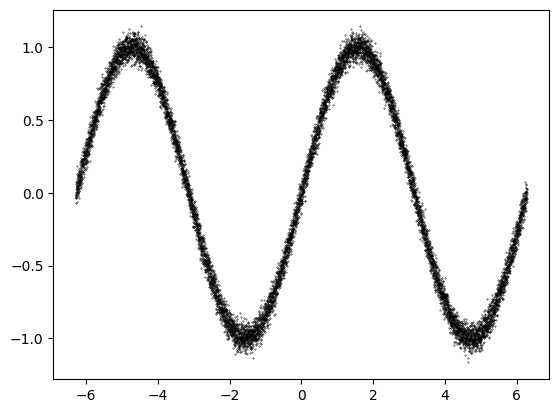

In [2]:
# generate the data
inputs = np.linspace(-2*np.pi, 2*np.pi, 10000)[:, None]
outputs = np.sin(inputs) + 0.05 * np.random.normal(size=[len(inputs),1])

plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')

## 모델 정의

In [3]:
model = Sequential([
layers.Dense(64, activation='relu'),
layers.Dense(32, activation='relu'),
layers.Dense(16, activation='relu'),
layers.Dense(1)
])

Metal device set to: Apple M1


2023-12-21 15:43:34.410266: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-21 15:43:34.410716: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## 모델 훈련

In [4]:
model.compile(optimizer='adam',
              loss='mae',
              metrics=['mae'])

model.fit(inputs, outputs, epochs=20)

Epoch 1/20


2023-12-21 15:43:34.667412: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-12-21 15:43:35.229492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 5s 11ms/step - loss: 0.3557 - mae: 0.3557
Epoch 2/20
313/313 [==============================] - 3s 9ms/step - loss: 0.2332 - mae: 0.2332
Epoch 3/20
313/313 [==============================] - 3s 8ms/step - loss: 0.1908 - mae: 0.1908
Epoch 4/20
313/313 [==============================] - 3s 8ms/step - loss: 0.1461 - mae: 0.1461
Epoch 5/20
313/313 [==============================] - 3s 9ms/step - loss: 0.1058 - mae: 0.1058
Epoch 6/20
313/313 [==============================] - 3s 8ms/step - loss: 0.0761 - mae: 0.0761
Epoch 7/20
313/313 [==============================] - 3s 10ms/step - loss: 0.0587 - mae: 0.0587
Epoch 8/20
313/313 [==============================] - 7s 23ms/step - loss: 0.0574 - mae: 0.0574
Epoch 9/20
313/313 [==============================] - 4s 14ms/step - loss: 0.0526 - mae: 0.0526
Epoch 10/20
313/313 [==============================] - 4s 11ms/step - loss: 0.0535 - mae: 0.0535
Epoch 11/20
313/313 [==============================] - 

In [5]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [6]:
test_loss, test_mae = test_output_pred = model.evaluate(inputs, outputs, verbose=0)
print('Test MAE:', test_mae)

2023-12-21 15:44:47.904920: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Test MAE: 0.052687421441078186


## 테스트

 48/313 [===>..........................] - ETA: 0s

2023-12-21 15:44:49.632178: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step


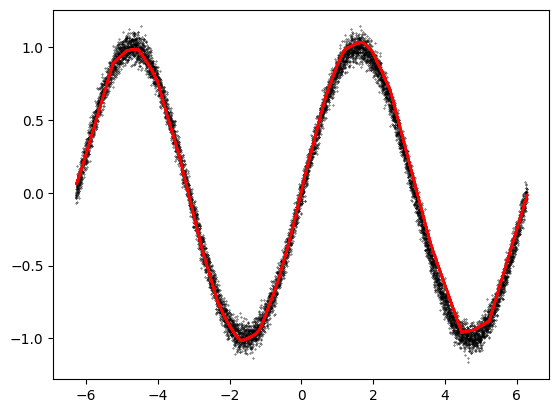

In [7]:
test_output_pred = model.predict(inputs)

plt.scatter(inputs[:, 0], outputs[:, 0], c='k', marker='o', s=0.1)
plt.scatter(inputs[:, 0], test_output_pred[:, 0], c='r', marker='o', s=0.1)